<a href="https://colab.research.google.com/github/ameliavasiliu/EDA/blob/main/GSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

In [40]:
import pandas as pd
#
var_list = ['divorce', 'agewed', 'sphrs2', 'sppres80', 'wrkstat', 'age'] # divorces, age when wed, the number of hours spouse works per week, spouse's occupational prestige score, labor force status, age
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# Q2

In [42]:
gss = pd.read_csv("selected_gss_data.csv")

**Brief Description and Summary:** The variables I chose are if the person is divorced, the age they were married (if applicable), the number of hours that their spouse works each week, their spouse's prestige occupation score, and labor force status (Last week were you working full time, part time, going to school, keeping house, or what?).
To summarize the data we can explore the unique values each variable has:

In [43]:
gss["divorce"].unique()

array([nan, 'no', 'yes'], dtype=object)

In [44]:
gss["wrkstat"].unique()

array(['working full time', 'retired', 'working part time',
       'keeping house', 'in school',
       'unemployed, laid off, looking for work',
       'with a job, but not at work because of temporary illness, vacation, strike',
       'other', nan], dtype=object)

In [45]:
gss["agewed"].unique()

array([nan, 21., 20., 24., 22., 19., 25., 17., 18., 16., 26., 30., 15.,
       37., 23., 35., 28., 29., 27., 43., 38., 14., 13., 31., 32., 33.,
       39., 36., 42., 40., 45., 46., 34., 58., 48., 55., 52., 63., 44.,
       41., 60., 51., 49., 12., 50., 73., 47., 56., 62., 68., 54., 61.,
       53., 57., 59., 70., 90., 65.])

In [46]:
gss["sphrs2"].unique()

array([nan, 73., 20., 40., 35., 48., 14., 50., 16., 84., 44., 56., 13.,
       32.,  8., 37., 72., 24., 12., 60., 54., 22., 43., 25., 38., 49.,
       30., 45., 36., 65., 57., 89., 55., 52., 70., 51., 21., 26., 10.,
        5., 46., 80., 47.,  1., 42., 39., 33., 27., 18., 15., 34.,  9.])

In [47]:
gss["sppres80"].unique()

array([nan, 75., 48., 39., 22., 30., 29., 86., 46., 44., 51., 59., 42.,
       34., 28., 40., 68., 43., 36., 35., 66., 50., 64., 52., 38., 32.,
       49., 47., 17., 24., 27., 60., 31., 37., 63., 33., 53., 57., 73.,
       67., 23., 65., 69., 41., 56., 25., 45., 21., 74., 20., 26., 55.,
       71., 61., 54., 62., 19., 58., 72., 70.])

In [48]:
gss["age"].unique()

array([23., 70., 48., 27., 61., 26., 28., 21., 30., 56., 54., 49., 41.,
       24., 62., 46., 57., 58., 71., 53., 42., 20., 25., 78., 35., 51.,
       76., 39., 64., 50., 40., 43., 37., 22., 31., 52., 47., 45., 68.,
       63., 19., 55., 44., 34., 36., 74., 69., 29., 67., 75., 38., 73.,
       84., 82., 72., 59., 33., 81., 65., 32., nan, 60., 80., 66., 77.,
       18., 79., 83., 85., 88., 87., 89., 86.])

There are two categroical vairables, divorced and labor status, as well as four numerical variables, spouse's work hours per week, spouse's occupation prestige score, age, and age when married. We can observe the unique data in each variable above. Labor status is the status of labor as of last week - that is the week before the survey was taken. The spouse's occupational prestige score was especially interesting to me, as I wanted to further explore the connection to divorce rates and other variables, such as average work hours per week. After some searching on the GSS database, I was able to observe that this score was calculated based on certain questions, such as employer (who was the employer or were they self employed), their occupation title, main duties, and the type of industry they worked in. I am hoping to explore if there are any connections between these variables, specifically looking into the connection between divorce rates and occupation statistics - that is, what makes someone more likely to be divorced from a profession standpoint? I assume that variables like working longer hours and marrying at a young age are associated with higher divorce rates. Additionally, I would like to explore if there is any correlation between age married and the occupational prestige score; that is, are people that get married younger more likely to attain jobs with higher prestige?

# Q3

In [49]:
#cleaning
gss["wrkstat"] = gss["wrkstat"].replace({
    "with a job, but not at work because of temporary illness, vacation, strike": "job but temporary illness, vacation, strike"
}) # making this a little shorter for label purposes in the graph

In [50]:
gss["agewed"].describe()

,agewed
count,26543.000000
mean,22.150058
std,4.885114
min,12.000000
25%,19.000000
50%,21.000000
75%,24.000000
max,90.000000


In [51]:
gss["sphrs2"].describe()

,sphrs2
count,675.000000
mean,41.428148
std,12.083738
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,89.000000


In [52]:
gss["sppres80"].describe()

,sppres80
count,15324.000000
mean,45.067541
std,13.642787
min,17.000000
25%,34.000000
50%,45.000000
75%,51.000000
max,86.000000


In [54]:
gss["age"].unique()

array([23., 70., 48., 27., 61., 26., 28., 21., 30., 56., 54., 49., 41.,
       24., 62., 46., 57., 58., 71., 53., 42., 20., 25., 78., 35., 51.,
       76., 39., 64., 50., 40., 43., 37., 22., 31., 52., 47., 45., 68.,
       63., 19., 55., 44., 34., 36., 74., 69., 29., 67., 75., 38., 73.,
       84., 82., 72., 59., 33., 81., 65., 32., nan, 60., 80., 66., 77.,
       18., 79., 83., 85., 88., 87., 89., 86.])

The numeric values are already a float 64 type, so we do not have to change the dtype. The Labor Force category has too many categories to re-map, so we can leave as is and use a histogram to further investigate the data.

# Q4

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

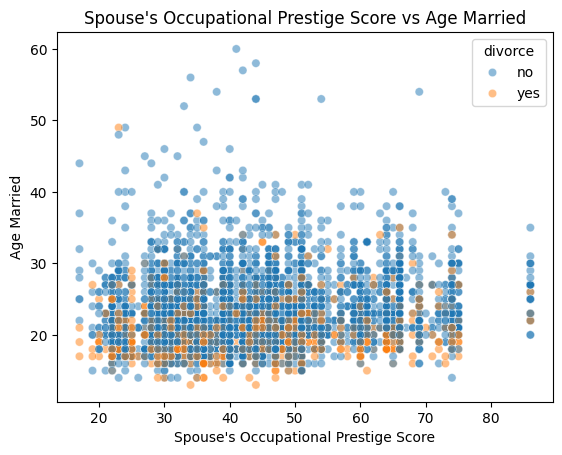

In [56]:
sns.scatterplot(gss, x = "sppres80", y = "agewed", hue = "divorce", alpha = 0.5)
plt.title("Spouse's Occupational Prestige Score vs Age Married")
plt.xlabel("Spouse's Occupational Prestige Score") # A higher score being more "prestigious"
plt.ylabel("Age Married")
plt.show()

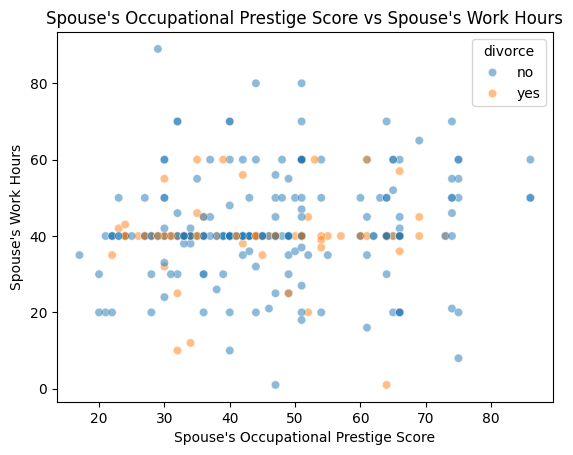

In [57]:
sns.scatterplot(gss, x = "sppres80", y = "sphrs2", hue = "divorce", alpha = 0.5)
plt.title("Spouse's Occupational Prestige Score vs Spouse's Work Hours")
plt.xlabel("Spouse's Occupational Prestige Score")
plt.ylabel("Spouse's Work Hours")
plt.show()

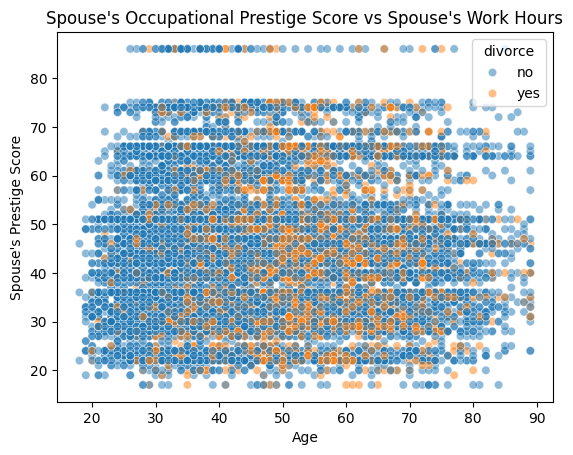

In [72]:
sns.scatterplot(gss, x = "age", y = "sppres80", hue = "divorce", alpha = 0.5)
plt.title("Spouse's Occupational Prestige Score vs Spouse's Work Hours")
plt.xlabel("Age")
plt.ylabel("Spouse's Prestige Score")
plt.show()

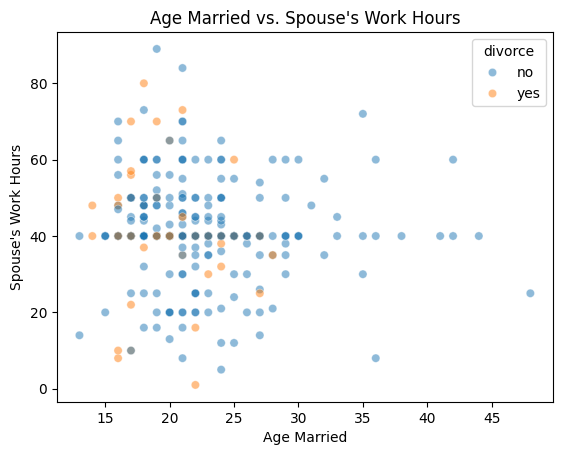

In [58]:
sns.scatterplot(gss, x = "agewed", y = "sphrs2", hue = "divorce", alpha = 0.5)
plt.xlabel("Age Married")
plt.ylabel("Spouse's Work Hours")
plt.title("Age Married vs. Spouse's Work Hours")
plt.show()

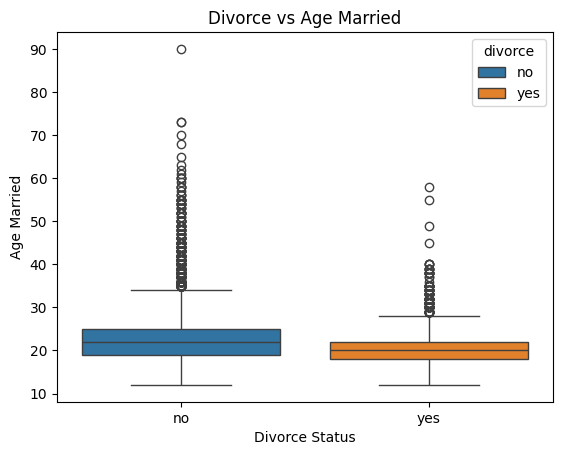

In [34]:
sns.boxplot(data = gss, x = "divorce", y = "agewed", hue = "divorce")
plt.title("Divorce vs Age Married")
plt.xlabel("Divorce Status")
plt.ylabel("Age Married")
plt.show()

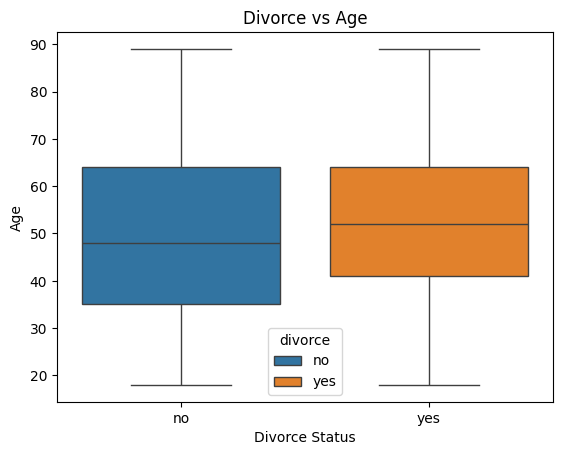

In [74]:
sns.boxplot(data = gss, x = "divorce", y = "age", hue = "divorce")
plt.title("Divorce vs Age")
plt.xlabel("Divorce Status")
plt.ylabel("Age")
plt.show()

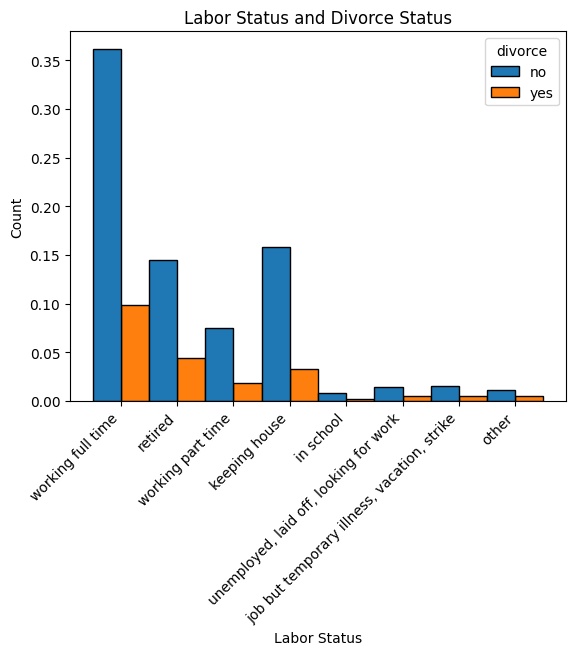

In [75]:
sns.histplot(data = gss, x = "wrkstat", hue = "divorce", alpha=1, multiple="dodge", stat ="probability") # the stat argument normalizes data
plt.xticks(rotation=45, ha='right')
plt.title("Labor Status and Divorce Status")
plt.xlabel("Labor Status")
plt.ylabel("Count")
plt.show()

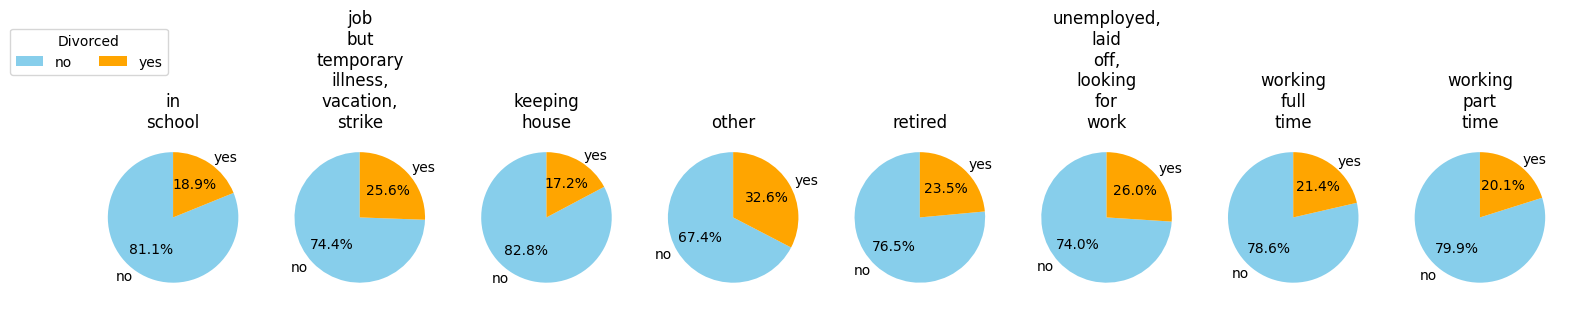

In [38]:
divorce_counts = gss.groupby(['wrkstat', 'divorce']).size().unstack()
fig, axes = plt.subplots(1, len(divorce_counts), figsize=(15, 6))
for i, (wrkstat, counts) in enumerate(divorce_counts.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "orange"])
    axes[i].set_title(f"{wrkstat}".replace(" ", "\n"))
plt.tight_layout()
plt.legend(bbox_to_anchor=(-7.5, 1.7), ncol=2, title = "Divorced")
plt.show()

# Q5

Although there may not appear to be any drastic correlations between variables, we can observe some small patterns and relationships within the data. Firstly, we can observe through scatterplot trends and observing histograms that people who are divorced have a slightly older on average. Also, people who marry younger appear to be more likely to be divorced; we can observe the divorced population observed on the Divorce vs Age married boxplot appears to be lower on the age married scale than that of the non-divorced population. Furthermore, we can observe that people who get married at a young age are more likely to be divorced. Additionally, I further investigated the proportions of divorced people within the labor type variable. By observing the histogram and pie charts, we can see that the labor force status with the highest proportion of divorce rates is “other”, meaning the person is not keeping house, in school, unemployed, laid off, looking for work, retired, temporary off from a job, working full time, or working part time. What “other” could mean I am not entirely sure, but 32.6% of people with the labor force status of “other” are divorced, which is a considerably higher percentage than people in other labor force statuses. Additionally, another interesting observation is that the labor force status with the smallest divorce rate is “keeping house”, which I attribute to stay at home parenting or something similar. This variable has a significantly lower divorce rate than other occupations. Furthermore, we can observe that unemployment has the second highest divorce rate, which is generally what I expected to observe with this data. Also, these are personal and sensitive questions to survey people with, so I expect some error in these results; I do not believe they are a completely accurate representation of the population, but they provide a good estimate.  